In [50]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [52]:
from sklearn.datasets import fetch_openml

In [53]:
boston = fetch_openml(name="boston", version=1, as_frame=True)
x= boston.data
y= boston.target

In [54]:
data=pd.DataFrame(x,columns=boston.feature_names)
data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03


In [55]:
y.head(3)

0    24.0
1    21.6
2    34.7
Name: MEDV, dtype: float64

In [56]:
data['Sale_prices'] = y
data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Sale_prices
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [57]:
boston.DESCR
#description

"**Author**:   \n**Source**: Unknown - Date unknown  \n**Please cite**:   \n\nThe Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic\nprices and the demand for clean air', J. Environ. Economics & Management,\nvol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics\n...', Wiley, 1980.   N.B. Various transformations are used in the table on\npages 244-261 of the latter.\nVariables in order:\nCRIM     per capita crime rate by town\nZN       proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS    proportion of non-retail business acres per town\nCHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\nNOX      nitric oxides concentration (parts per 10 million)\nRM       average number of rooms per dwelling\nAGE      proportion of owner-occupied units built prior to 1940\nDIS      weighted distances to five Boston employment centres\nRAD      index of accessibility to radial highways\nTAX      full-value prope

In [58]:
data.shape

(506, 14)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CRIM         506 non-null    float64 
 1   ZN           506 non-null    float64 
 2   INDUS        506 non-null    float64 
 3   CHAS         506 non-null    category
 4   NOX          506 non-null    float64 
 5   RM           506 non-null    float64 
 6   AGE          506 non-null    float64 
 7   DIS          506 non-null    float64 
 8   RAD          506 non-null    category
 9   TAX          506 non-null    float64 
 10  PTRATIO      506 non-null    float64 
 11  B            506 non-null    float64 
 12  LSTAT        506 non-null    float64 
 13  Sale_prices  506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [60]:
data.describe

<bound method NDFrame.describe of         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  Sale_prices  
0       15.3  396.90   4.98         24.0  
1  

In [61]:
#EDA

In [62]:
data.isnull().sum()

CRIM           0
ZN             0
INDUS          0
CHAS           0
NOX            0
RM             0
AGE            0
DIS            0
RAD            0
TAX            0
PTRATIO        0
B              0
LSTAT          0
Sale_prices    0
dtype: int64

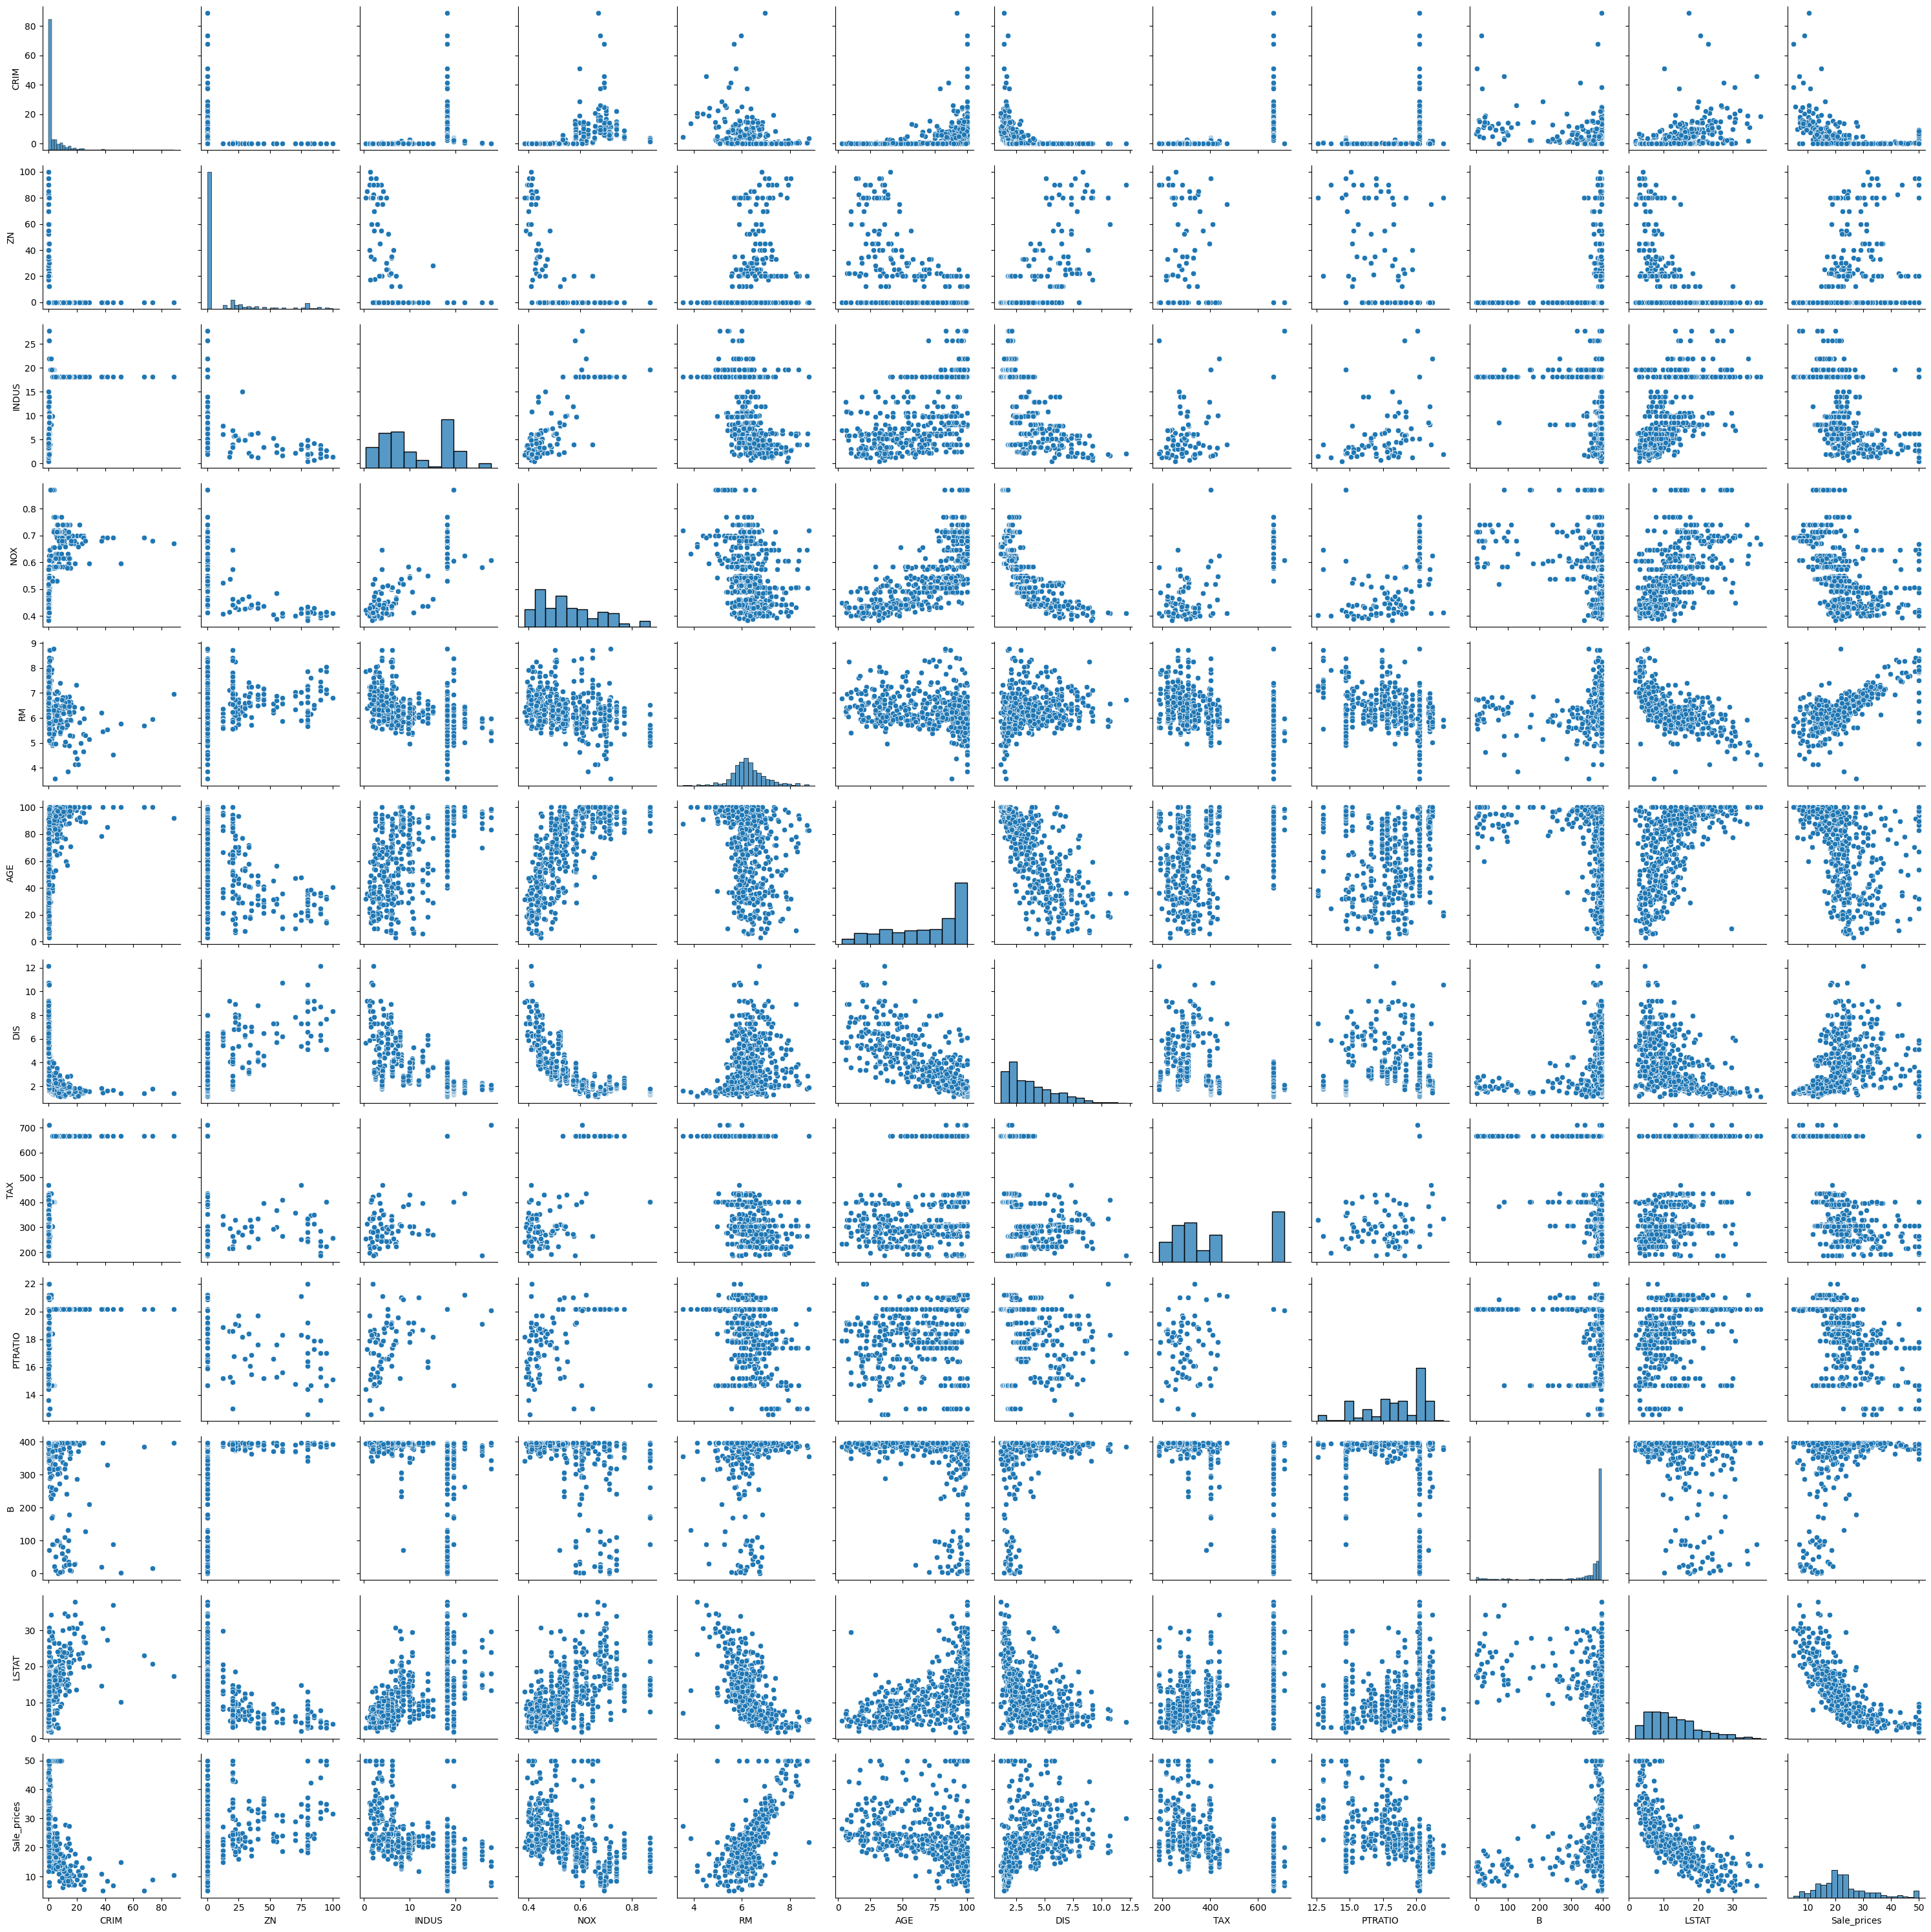

In [63]:
sns.pairplot(data, height=2.5)
plt.tight_layout()

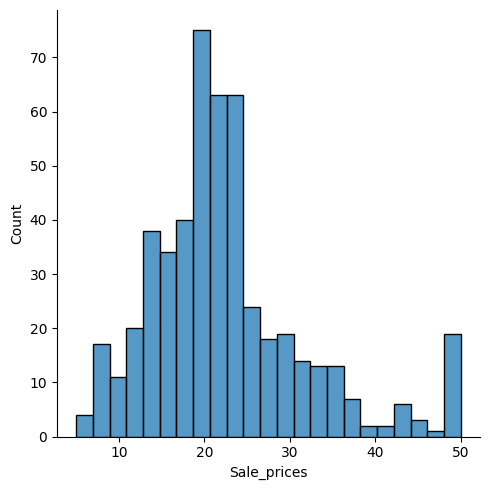

In [64]:
sns.displot(data['Sale_prices'])

In [65]:
print(f"Skewness: {data['Sale_prices'].skew():.2f}")
print(f"Kurtosis: {data['Sale_prices'].kurt():.2f}")

Skewness: 1.11
Kurtosis: 1.50


Text(0, 0.5, 'CRM')

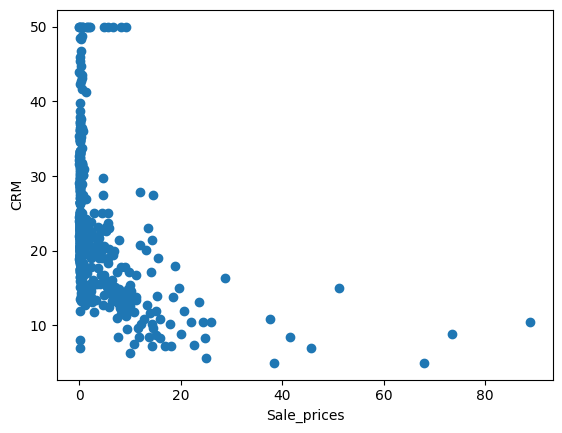

In [66]:
fig, ax = plt.subplots()
ax.scatter(x=data['CRIM'],y=data['Sale_prices'])
plt.xlabel('Sale_prices')
plt.ylabel('CRM')


Text(0.5, 0, 'AGE')

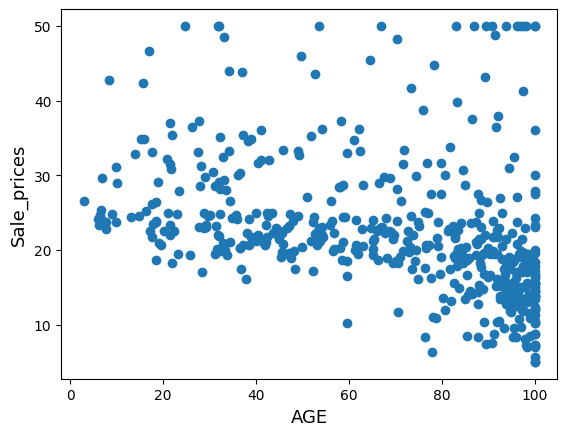

In [67]:
fig, ax = plt.subplots()
ax.scatter(x = data['AGE'], y = data['Sale_prices'])
plt.ylabel('Sale_prices', fontsize=13)
plt.xlabel('AGE', fontsize=13)


In [68]:
from scipy import stats
from scipy.stats import norm, skew

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4832\2923480277.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sale_prices'] , fit=norm);


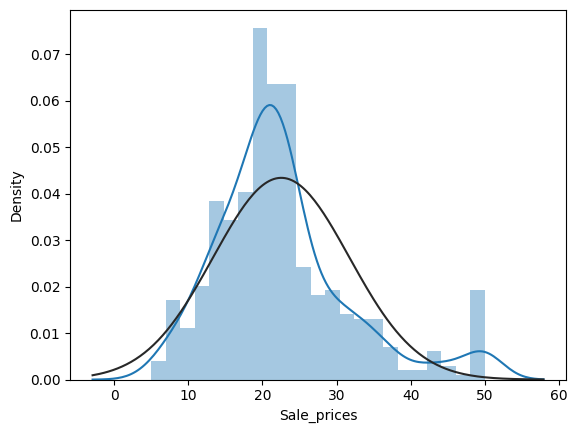

In [69]:
sns.distplot(data['Sale_prices'] , fit=norm);


In [75]:
(mu, sigma) = norm.fit(data['Sale_prices'])
print("mu:{:.2f}".format(mu))
print("sigma:{:.2f}".format(sigma))


mu:3.09
sigma:0.39


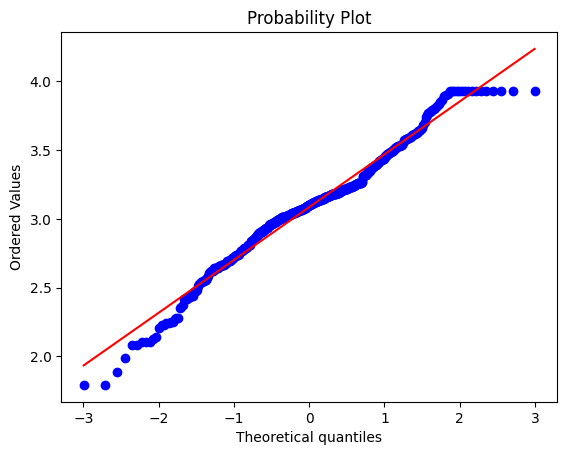

In [76]:
fig = plt.figure()
res = stats.probplot(data['Sale_prices'], plot=plt)


<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4832\1588650499.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4832\1588650499.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'] , fit=norm);



 mu = 0.88 and sigma = 0.04



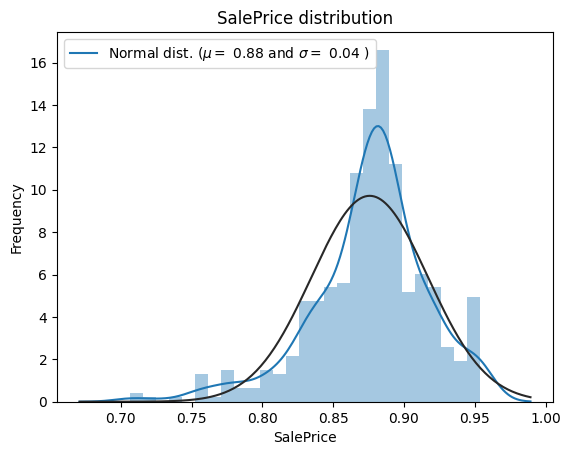

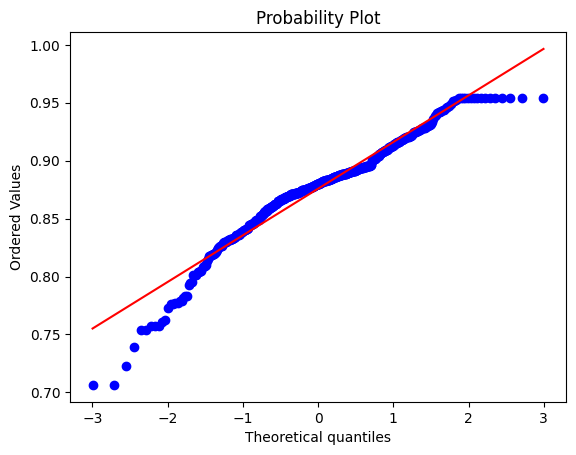

In [85]:
data["Sale_prices"] = np.log1p(data["Sale_prices"])
sns.distplot(data['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()

AttributeError: 'Series' object has no attribute 'iteritems'

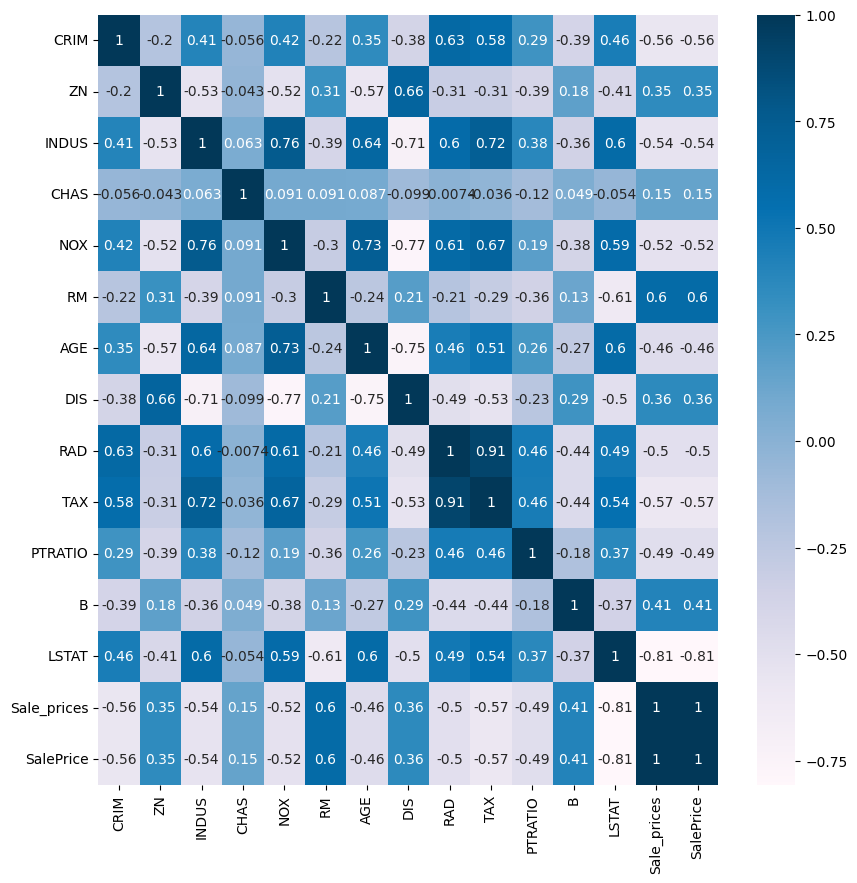

In [89]:
plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [90]:
cor_target = abs(cor["SalePrice"]) 

relevant_features = cor_target[cor_target>0.2] 

names = [index for index, value in relevant_features.items()] 

names.remove('SalePrice') 

print(names) 
print(len(names))

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Sale_prices']
13


In [102]:
from sklearn.model_selection import train_test_split 

X = data.drop("Sale_prices", axis=1) 
y = data["Sale_prices"]
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#X_train: tập dữ liệu đầu vào (các đặc trưng/features, dạng ma trận 2D).
#y_train: nhãn hoặc giá trị mục tiêu (target/outpu

In [109]:
y

0      0.891821
1      0.881846
2      0.924513
3      0.921278
4      0.928059
         ...   
501    0.885323
502    0.877261
503    0.891432
504    0.883605
505    0.819331
Name: Sale_prices, Length: 506, dtype: float64

In [103]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 23)
(102, 23)
(404,)
(102,)


In [104]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression() 
lr.fit(X_train, y_train)
#fit = học từ dữ liệu huấn luyện


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [105]:
print(type(X_test))
print(X_test.shape)


<class 'pandas.core.frame.DataFrame'>
(102, 23)


In [106]:
predictions = lr.predict(X_test)  

print("Actual value of the house:- ", y_test[0]) 
print("Model Predicted Value:- ", predictions[0])

Actual value of the house:-  0.8918212615283342
Model Predicted Value:-  0.8902498837143388


In [107]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions) 
rmse = np.sqrt(mse)
print(rmse)

6.634981702722919e-16
